# Assignment 5: Deep Learning {-}

This assignment aims at familiarizing you with training and testing a Deep Neural Network (DNN). The dataset you will be working on is CIFAR-10. You will have to do:

1.  **(5 points) Coding tasks:** The following questions involve writing code to complete specific tasks.  
    1.1 *(1 point)* Load the CIFAR-10 dataset, visualize sample images, and perform data normalization to improve training performance.  
    1.2 *(1 point)* First network: Build, train, and test a deep neural network with at least three convolutional layers, two fully connected layers, and two pooling layers.  
    1.3 *(1 point)* Second network: Build, train, and test another deep neural network, with an architecture of your choice, but at most 4M (four million) parameters, ensuring the architecture meets this constraint by verifying with model.summary().  
    1.4 *(2 points)* Modify the second network architecture by tuning the layer hyperparameters or adjusting the layer design to improve test accuracy while remaining within the four million parameter limit. Discuss your observations and the trade offs of the changes you make.  

2.  **(5 points) Open discussion questions:** These discussion questions ask you to analyze and argue your points.  Feel free to include relevant code examples to strengthen your arguments.  
    2.1 *(1 point)* How did hyperparameter tuning (learning rate, dropout, batch size) affect your model’s accuracy? Were there any unexpected results?  
    2.2 *(1 point)* How did the constraint of keeping the model within 4 million parameters impact your design choices? Would a larger model necessarily perform better?  
    2.3 *(1 point)* How can deep learning models trained on datasets like CIFAR-10 be applied in real-world scenarios? Give an example.  
    2.4 *(1 point)* Deep learning models for image recognition can have biases. What ethical concerns should be considered when deploying such models?  
    2.5 *(1 point)* What was the most interesting or challenging part of this assignment? If you had more time, what additional improvements would you make?  

The dataset you will be working on is CIFAR-10 (https://www.cs.toronto.edu/~kriz/cifar.html) which consists of 60,000 32x32 colour images in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images. Here follows the ten object classes:
* airplane
*	automobile
*	bird
*	cat
*	deer
*	dog
*	frog
*	horse
*	ship
*	truck

Here follows some data samples in the dataset:

![alt text](https://docs.pytorch.org/tutorials/_images/cifar10.png)

### Submission {-}
The structure of submission folder should be organized as follows:

- ./\<StudentID>-assignment5-notebook.ipynb: Jupyter notebook containing source code.
- ./\<Test-accuracy>-\<StudentID>.txt: accuracy of the second network on the test set (for extra credit, see the 'Evaluation' part below). For example if you get 0.8124 accuracy, the name of this file is 08124-2012345.txt. The file content is left empty.

The submission folder is named ML4DS-\<StudentID>-Assignment5 (e.g., ML4DS-2012345-Assigment5) and then compressed with the same name.
    
### Evaluation {-}
Assignment evaluation will be conducted on how you accomplish the assignment requirements. It is a plus if you have modeling steps other than the basic requirements and achieve an excellent model accuracy. In addition, your code should conform to a Python coding convention such as PEP-8.

EXTRA CREDIT: Top-3 submissions achieving the highest test accuracy on the second network (of 4M params at most) will be rewarded an extra credit. **You have to ensure the architecture meets this constraint by verifying and printing out the number of parameters with model.summary(). Please follow the submission format to be eligible for this extra credit.**

### Deadline {-}
Please visit Canvas for details.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras              # Keras is the high-level API of TensorFlow
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import numpy as np

In [2]:
# PLEASE DO NOT CHANGE THIS CODE

# Load the cifar10 dataset and split train/test
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Split train/valid from the training set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=5)

y_train = y_train.reshape(-1,)
y_val = y_val.reshape(-1,)
y_test = y_test.reshape(-1,)


print("Train shape: X_train = " + str(X_train.shape) + ", y_train = " + str(y_train.shape))
print("Validation shape: X_val = " + str(X_val.shape) + ", y_val = " + str(y_val.shape))
print("Test shape: X_test = " + str(X_test.shape) + ", y_test = " + str(y_test.shape))

Train shape: X_train = (45000, 32, 32, 3), y_train = (45000,)
Validation shape: X_val = (5000, 32, 32, 3), y_val = (5000,)
Test shape: X_test = (10000, 32, 32, 3), y_test = (10000,)


In [3]:
# # Show some samples in the dataset
# import matplotlib.pyplot as plt
# imgplot = plt.imshow(X_train[44999])
# plt.show()
# imgplot = plt.imshow(X_test[4999])
# plt.show()

## 1. Coding tasks

1. Load the CIFAR-10 dataset, visualize sample images, and perform data normalization to improve training performance.

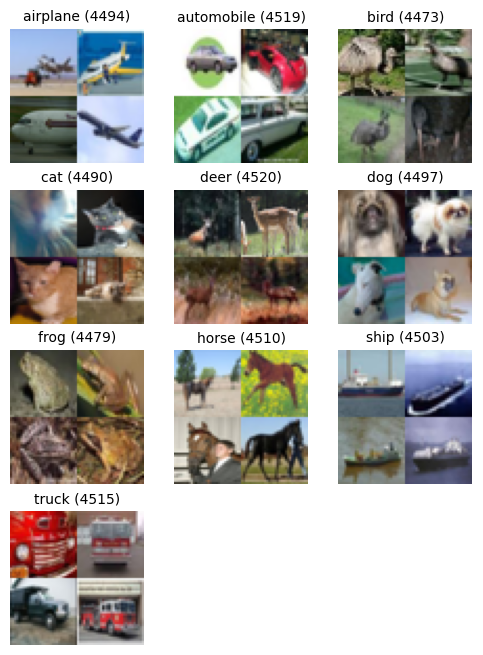

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# CIFAR-10 class names
class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

# Count how many samples belong to each class
class_counts = np.bincount(y_train.flatten(), minlength=10)

# For each class, collect indices of all images
class_indices = {i: np.where(y_train.flatten() == i)[0] for i in range(10)}

# Plot setup
fig, axes = plt.subplots(4, 3, figsize=(6, 8))
axes = axes.flatten()

for i in range(10):
    ax = axes[i]

    # Randomly pick 4 images from this class
    idxs = np.random.choice(class_indices[i], 4, replace=False)
    imgs = X_train[idxs]

    # Create a small 2x2 grid inside the subplot
    combined = np.zeros((64, 64, 3), dtype=np.uint8)  # 32*2 = 64 pixels per side
    combined[:32, :32] = imgs[0]
    combined[:32, 32:] = imgs[1]
    combined[32:, :32] = imgs[2]
    combined[32:, 32:] = imgs[3]

    ax.imshow(combined)
    ax.set_title(f"{class_names[i]} ({class_counts[i]})", fontsize=10)
    ax.axis("off")

# Turn off remaining unused subplots
for ax in axes[10:]:
    ax.axis("off")

plt.show()


In [5]:
# Convert pixel values from 0–255 to 0–1 (normalizing)
X_train_norm = X_train.astype("float32") / 255.0
X_val_norm = X_val.astype("float32") / 255.0
X_test_norm = X_test.astype("float32") / 255.0

print("Data normalized: pixel values are now between 0 and 1.")
print("Random normalized pixel: ", X_train_norm[44998][16][16])

Data normalized: pixel values are now between 0 and 1.
Random normalized pixel:  [0.09803922 0.07058824 0.0627451 ]


2. First network: Build, train, and test a deep neural network with at least three convolutional layers, two fully connected layers, and two pooling layers

In [6]:
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
# from keras.layers import GlobalAveragePooling2D, Dense, Dropout
# from keras.utils import to_categorical

# # Make sure labels are one-hot encoded
# y_train_cat = to_categorical(y_train, 10)
# y_val_cat   = to_categorical(y_val, 10)
# y_test_cat  = to_categorical(y_test, 10)

# model = Sequential()

# # -------------------------
# # Block 1 (High width)
# # -------------------------
# model.add(Conv2D(64, (3,3), padding='same', activation='relu',
#                  input_shape=(X_train_norm.shape[1], X_train_norm.shape[2], X_train_norm.shape[3])))
# model.add(BatchNormalization())
# model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D((2,2)))  # <-- 1st pooling

# # -------------------------
# # Block 2
# # -------------------------
# model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D((2,2)))  # <-- 2nd pooling

# # -------------------------
# # Block 3 (Wider)
# # -------------------------
# model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
# model.add(BatchNormalization())




# # -------------------------
# # Global Average Pooling instead of Flatten
# # -------------------------
# model.add(GlobalAveragePooling2D())

# # -------------------------
# # Fully connected layers
# # -------------------------
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.35))

# # Output
# model.add(Dense(10, activation='softmax'))

# # -------------------------
# # Compile
# # -------------------------
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# model.summary()

# # -------------------------
# # Train model
# # -------------------------
# history = model.fit(
#     X_train_norm, y_train_cat,
#     epochs=30,
#     batch_size=64,
#     validation_data=(X_val_norm, y_val_cat)
# )

# # -------------------------
# # Evaluate
# # -------------------------
# test_loss, test_acc = model.evaluate(X_test_norm, y_test_cat)
# print("Test Accuracy:", test_acc)


In [7]:
# # Visualize training and validation performance
# f,ax=plt.subplots(2,1)

# # Plot training and validation loss
# ax[0].plot(history.history['loss'], color='b',label='Training Loss')
# ax[0].plot(history.history['val_loss'],color='r',label='Validation Loss')

# # Plot training and validation accuracy
# ax[1].plot(history.history['accuracy'],color='b',label='Training Accuracy')
# ax[1].plot(history.history['val_accuracy'],color='r',label='Validation Accuracy')

# plt.legend()

3. Second network: Build, train, and test another deep neural network, with an architecture of your choice, but at most 4M (four million) parameters, ensuring the architecture meets this constraint by verifying with model.summary().

In [8]:
# -----------------------------
# Cell 2: Data Augmentation
# -----------------------------

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    zoom_range=0.1
)
datagen.fit(X_train_norm)


In [9]:
# -----------------------------
# Cell 3: Small DenseNet Model
# -----------------------------

def dense_block(x, growth_rate, layers_in_block):
    for _ in range(layers_in_block):
        cb = layers.BatchNormalization()(x)
        cb = layers.ReLU()(cb)
        cb = layers.Conv2D(4*growth_rate, kernel_size=1, padding='same')(cb)
        cb = layers.BatchNormalization()(cb)
        cb = layers.ReLU()(cb)
        cb = layers.Conv2D(growth_rate, kernel_size=3, padding='same')(cb)
        x = layers.Concatenate()([x, cb])
    return x

def transition_layer(x, reduction=0.5):
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    filters = int(x.shape[-1] * reduction)
    x = layers.Conv2D(filters, kernel_size=1, padding='same')(x)
    x = layers.Dropout(0.2)(x)
    x = layers.AveragePooling2D(pool_size=2, strides=2)(x)
    return x

inputs = layers.Input(shape=(32, 32, 3))
x = layers.Conv2D(32, 3, padding='same', activation='relu')(inputs)

# Dense blocks
x = dense_block(x, growth_rate=24, layers_in_block=6)
x = layers.Dropout(0.2)(x)
x = transition_layer(x)
x = dense_block(x, growth_rate=24, layers_in_block=12)
x = layers.Dropout(0.2)(x)
x = transition_layer(x)
x = dense_block(x, growth_rate=24, layers_in_block=18)
x = layers.Dropout(0.2)(x)
x = transition_layer(x)
x = dense_block(x, growth_rate=24, layers_in_block=24)

x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.33)(x)

outputs = layers.Dense(10, activation='softmax')(x)

dnn_model = models.Model(inputs, outputs)
dnn_model.summary()  # Make sure params < 4M


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 32, 32,    │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 32, 32,    │        128 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 32, 32,    │      3,168 │ re_lu[0][0]       │
│                     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        384 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 32, 32,    │     20,760 │ re_lu_1[0][0]     │
│                     │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 32, 32,    │          0 │ conv2d[0][0],     │
│ (Concatenate)       │ 56)               │            │ conv2d_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        224 │ concatenate[0][0] │
│ (BatchNormalizatio… │ 56)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_2 (ReLU)      │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 56)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 32, 32,    │      5,472 │ re_lu_2[0][0]     │
│                     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        384 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_3 (ReLU)      │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 32, 32,    │     20,760 │ re_lu_3[0][0]     │
│                     │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 32, 32,    │          0 │ concatenate[0][0… │
│ (Concatenate)       │ 80)               │            │ conv2d_4[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        320 │ concatenate_1[0]

 Total params: 3,999,016 (15.26 MB)

 Trainable params: 3,936,528 (15.02 MB)

 Non-trainable params: 62,488 (244.09 KB)

In [10]:
# -----------------------------
# Cell 4: Compile the Model
# -----------------------------
dnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',  # y_train is integer labels
    metrics=['accuracy']
)


In [11]:
# -----------------------------
# Cell 5: Callbacks
# -----------------------------

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    'best_small_densenet_cifar10.h5',
    monitor='val_loss',
    save_best_only=True
)


In [12]:
# -----------------------------
# Cell 6: Train the Model
# -----------------------------
batch_size = 128
num_epochs = 200

history = dnn_model.fit(
    datagen.flow(X_train_norm, y_train, batch_size=batch_size),
    epochs=num_epochs,
    validation_data=(X_val_norm, y_val),
    callbacks=[early_stop, checkpoint]
)


Epoch 1/200
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3120 - loss: 2.0193

352/352 ━━━━━━━━━━━━━━━━━━━━ 827s 2s/step - accuracy: 0.3687 - loss: 1.8091 - val_accuracy: 0.2478 - val_loss: 2.2733
Epoch 2/200
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4902 - loss: 1.4168

352/352 ━━━━━━━━━━━━━━━━━━━━ 754s 2s/step - accuracy: 0.5183 - loss: 1.3373 - val_accuracy: 0.4916 - val_loss: 1.4667
Epoch 3/200
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6093 - loss: 1.1014

352/352 ━━━━━━━━━━━━━━━━━━━━ 768s 2s/step - accuracy: 0.6187 - loss: 1.0741 - val_accuracy: 0.5798 - val_loss: 1.2342
Epoch 4/200
352/352 ━━━━━━━━━━━━━━━━━━━━ 764s 2s/step - accuracy: 0.6715 - loss: 0.9323 - val_accuracy: 0.4776 - val_loss: 2.3212
Epoch 5/200
352/352 ━━━━━━━━━━━━━━━━━━━━ 781s 2s/step - accuracy: 0.7103 - loss: 0.8298 - val_accuracy: 0.5148 - val_loss: 2.1482
Epoch 6/200
352/352 ━━━━━━━━━━━━━━━━━━━━ 770s 2s/step - accuracy: 0.7488 - loss: 0.7255 - val_accuracy: 0.5770 - val_loss: 1.6080
Epoch 7/200
352/352 ━━━━━━━━━━━━━━━━━━━━ 785s 2s/step - accuracy: 0.7737 - loss: 0.6559 - val_accuracy: 0.5372 - val_loss: 1.9728
Epoch 8/200
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7925 - loss: 0.6020

352/352 ━━━━━━━━━━━━━━━━━━━━ 796s 2s/step - accuracy: 0.7948 - loss: 0.5982 - val_accuracy: 0.7112 - val_loss: 0.9578
Epoch 9/200
352/352 ━━━━━━━━━━━━━━━━━━━━ 786s 2s/step - accuracy: 0.8080 - loss: 0.5595 - val_accuracy: 0.6980 - val_loss: 1.1950
Epoch 10/200
352/352 ━━━━━━━━━━━━━━━━━━━━ 788s 2s/step - accuracy: 0.8169 - loss: 0.5288 - val_accuracy: 0.4752 - val_loss: 3.4547
Epoch 11/200
352/352 ━━━━━━━━━━━━━━━━━━━━ 784s 2s/step - accuracy: 0.8331 - loss: 0.4898 - val_accuracy: 0.6986 - val_loss: 1.1983
Epoch 12/200
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8337 - loss: 0.4781

352/352 ━━━━━━━━━━━━━━━━━━━━ 805s 2s/step - accuracy: 0.8365 - loss: 0.4731 - val_accuracy: 0.7592 - val_loss: 0.8264
Epoch 13/200
352/352 ━━━━━━━━━━━━━━━━━━━━ 819s 2s/step - accuracy: 0.8482 - loss: 0.4367 - val_accuracy: 0.5840 - val_loss: 1.8524
Epoch 14/200
352/352 ━━━━━━━━━━━━━━━━━━━━ 802s 2s/step - accuracy: 0.8540 - loss: 0.4253 - val_accuracy: 0.7476 - val_loss: 0.8704
Epoch 15/200
352/352 ━━━━━━━━━━━━━━━━━━━━ 797s 2s/step - accuracy: 0.8600 - loss: 0.4052 - val_accuracy: 0.7274 - val_loss: 1.0287
Epoch 16/200
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8691 - loss: 0.3740

352/352 ━━━━━━━━━━━━━━━━━━━━ 810s 2s/step - accuracy: 0.8662 - loss: 0.3843 - val_accuracy: 0.8112 - val_loss: 0.6292
Epoch 17/200
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8718 - loss: 0.3643

352/352 ━━━━━━━━━━━━━━━━━━━━ 826s 2s/step - accuracy: 0.8718 - loss: 0.3679 - val_accuracy: 0.8068 - val_loss: 0.5808
Epoch 18/200
352/352 ━━━━━━━━━━━━━━━━━━━━ 829s 2s/step - accuracy: 0.8821 - loss: 0.3469 - val_accuracy: 0.8070 - val_loss: 0.6590
Epoch 19/200
352/352 ━━━━━━━━━━━━━━━━━━━━ 826s 2s/step - accuracy: 0.8839 - loss: 0.3400 - val_accuracy: 0.8194 - val_loss: 0.6283
Epoch 20/200
352/352 ━━━━━━━━━━━━━━━━━━━━ 825s 2s/step - accuracy: 0.8900 - loss: 0.3243 - val_accuracy: 0.7924 - val_loss: 0.7495
Epoch 21/200
352/352 ━━━━━━━━━━━━━━━━━━━━ 827s 2s/step - accuracy: 0.8919 - loss: 0.3135 - val_accuracy: 0.7766 - val_loss: 0.8482
Epoch 22/200
352/352 ━━━━━━━━━━━━━━━━━━━━ 822s 2s/step - accuracy: 0.8982 - loss: 0.2956 - val_accuracy: 0.8182 - val_loss: 0.6942
Epoch 23/200
352/352 ━━━━━━━━━━━━━━━━━━━━ 825s 2s/step - accuracy: 0.8965 - loss: 0.2987 - val_accuracy: 0.7776 - val_loss: 0.8158
Epoch 24/200
352/352 ━━━━━━━━━━━━━━━━━━━━ 817s 2s/step - accuracy: 0.9028 - loss: 0.2843 - val_a

352/352 ━━━━━━━━━━━━━━━━━━━━ 816s 2s/step - accuracy: 0.9097 - loss: 0.2622 - val_accuracy: 0.8404 - val_loss: 0.5359
Epoch 27/200
352/352 ━━━━━━━━━━━━━━━━━━━━ 830s 2s/step - accuracy: 0.9124 - loss: 0.2517 - val_accuracy: 0.7546 - val_loss: 1.1403
Epoch 28/200
352/352 ━━━━━━━━━━━━━━━━━━━━ 833s 2s/step - accuracy: 0.9152 - loss: 0.2456 - val_accuracy: 0.7988 - val_loss: 0.7709
Epoch 29/200
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9181 - loss: 0.2347

352/352 ━━━━━━━━━━━━━━━━━━━━ 829s 2s/step - accuracy: 0.9187 - loss: 0.2350 - val_accuracy: 0.8684 - val_loss: 0.4619
Epoch 30/200
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9243 - loss: 0.2222

352/352 ━━━━━━━━━━━━━━━━━━━━ 838s 2s/step - accuracy: 0.9218 - loss: 0.2283 - val_accuracy: 0.8682 - val_loss: 0.4358
Epoch 31/200
352/352 ━━━━━━━━━━━━━━━━━━━━ 845s 2s/step - accuracy: 0.9224 - loss: 0.2217 - val_accuracy: 0.8456 - val_loss: 0.5905
Epoch 32/200
352/352 ━━━━━━━━━━━━━━━━━━━━ 845s 2s/step - accuracy: 0.9275 - loss: 0.2114 - val_accuracy: 0.8058 - val_loss: 0.8053
Epoch 33/200
352/352 ━━━━━━━━━━━━━━━━━━━━ 844s 2s/step - accuracy: 0.9267 - loss: 0.2104 - val_accuracy: 0.8576 - val_loss: 0.5928
Epoch 34/200
352/352 ━━━━━━━━━━━━━━━━━━━━ 847s 2s/step - accuracy: 0.9291 - loss: 0.2043 - val_accuracy: 0.8534 - val_loss: 0.5116
Epoch 35/200
352/352 ━━━━━━━━━━━━━━━━━━━━ 865s 2s/step - accuracy: 0.9316 - loss: 0.1962 - val_accuracy: 0.8270 - val_loss: 0.6811
Epoch 36/200
352/352 ━━━━━━━━━━━━━━━━━━━━ 846s 2s/step - accuracy: 0.9322 - loss: 0.1944 - val_accuracy: 0.8742 - val_loss: 0.4488
Epoch 37/200
352/352 ━━━━━━━━━━━━━━━━━━━━ 855s 2s/step - accuracy: 0.9336 - loss: 0.1902 - val_a

In [13]:
# -----------------------------
# Cell 7: Evaluate on Test Set
# -----------------------------
test_loss, test_acc = dnn_model.evaluate(X_test_norm, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 81s 257ms/step - accuracy: 0.8675 - loss: 0.4411
Test Loss: 0.4411, Test Accuracy: 0.87


4. Modify the second network architecture by tuning the layer hyperparameters or adjusting the layer design to improve test accuracy while remaining within the four million parameter limit. Discuss your observations and the trade offs of the changes you make.

In [14]:
# Your code goes here. Please make sure to explain the reasons behind your data processing and modeling choices.
# 1.4

## 2. Open discussion questions

1. How did hyperparameter tuning (learning rate, dropout, batch size) affect your model’s accuracy? Were there any unexpected results?

In [15]:
# Your argument goes here. Please include data visualization and analysis to back up your argument.
# 2.1

2. How did the constraint of keeping the model within 4 million parameters impact your design choices? Would a larger model necessarily perform better?

In [16]:
# Your argument goes here. Please include data visualization and analysis to back up your argument.
# 2.2

3. How can deep learning models trained on datasets like CIFAR-10 be applied in real-world scenarios? Give an example.

In [17]:
# Your argument goes here. Please include data visualization and analysis to back up your argument.
# 2.3

4. Deep learning models for image recognition can have biases. What ethical concerns should be considered when deploying such models?

In [18]:
# Your argument goes here. Please include data visualization and analysis to back up your argument.
# 2.4

5. What was the most interesting or challenging part of this assignment? If you had more time, what additional improvements would you make?

In [19]:
# Your argument goes here. Please include data visualization and analysis to back up your argument.
# 2.5